## Clustering
One of the main ideas behind collaborative filtering is that if user A has the same opinion of
a product as user B, then A is also more likely to have the same opinion as B on another
product than that of a randomly chosen user.


Clustering is one of the most popular techniques used in collaborative-filtering algorithms.
It is a type of unsupervised learning that groups data points into different classes in such a
way that data points belonging to a particular class are more similar to each other than data
points belonging to different classes:

### K-means clustering

The k-means algorithm is one of the simplest yet most popular machine learning
algorithms. It takes in the data points and the number of clusters (k) as input.
Next, it randomly plots k different points on the plane (called centroids). After the k
centroids are randomly plotted, the following two steps are repeatedly performed until
there is no further change in the set of k centroids:
- Assignment of points to the centroids: Every data point is assigned to the
centroid that is the closest to it. The collection of data points assigned to a
particular centroid is called a cluster. Therefore, the assignment of points to k
centroids results in the formation of k clusters.
- Reassignment of centroids: In the next step, the centroid of every cluster is
recomputed to be the center of the cluster (or the average of all the points in the
cluster). All the data points are then reassigned to the new centroids:

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets._samples_generator import make_blobs


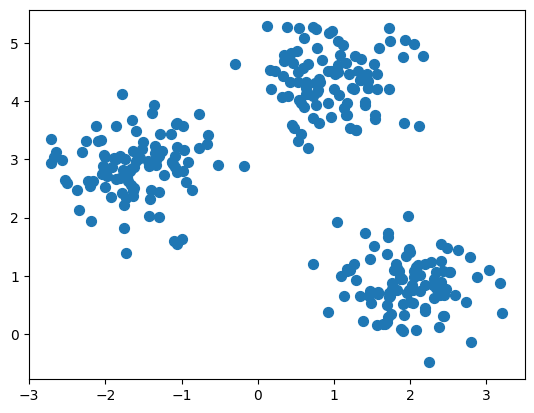

In [2]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

In [7]:
X.shape, y.shape, X[:2], y[:5]

((300, 2),
 (300,),
 array([[0.51985897, 4.86229547],
        [1.69246883, 0.20598168]]),
 array([0, 1, 0, 2, 2]))

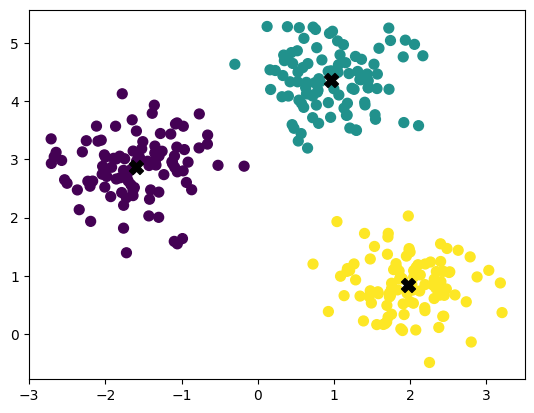

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="random", max_iter=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=100, marker="X")


In [10]:
type(centroids), centroids.shape

(numpy.ndarray, (3, 2))

#### Choosing K
Choosing a good value of k is vital to the success of the
k-means clustering algorithm. The number of clusters can be anywhere between 1 and the
total number of data points (where each point is assigned to its own cluster).

<Axes: >

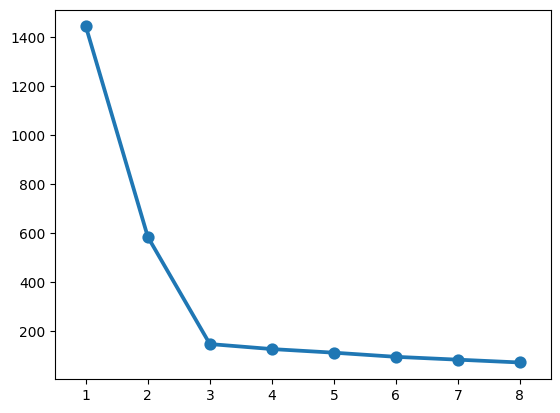

In [13]:
# list of sum of squares
# The sum of squares value is defined as the sum of the distances of each data point to the
# centroid of the cluster to which it was assigned.
ss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=10, init="random").fit(X)
    ## append the value of SS for 
    ss.append(kmeans.inertia_)

sns.pointplot(x = [j for j in range(1, 9)], y = ss)


### Other Clustering Algorithms

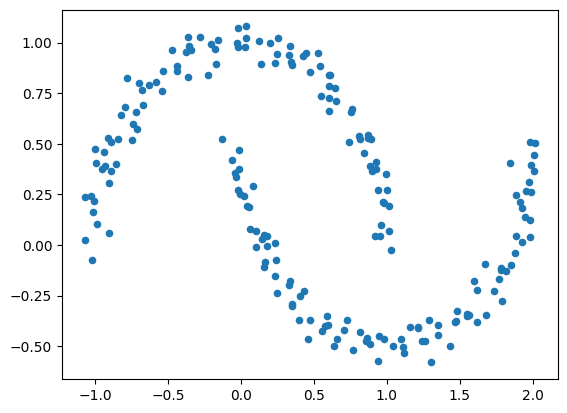

In [16]:
from sklearn.datasets import make_moons

X_m, y_m = make_moons(200, noise=0.05, random_state=0)
plt.scatter(X_m[:, 0], X_m[:, 1], s = 20)

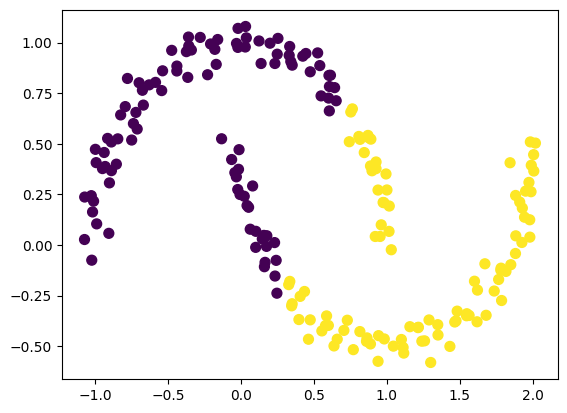

In [17]:
kmm = KMeans(n_clusters=2, init="random", max_iter=10)
kmm.fit(X_m)

y_m_pred = kmm.predict(X_m)
plt.scatter(X_m[:, 0], X_m[:, 1], c = y_m_pred, s = 50)

/home/nirajan/miniconda3/envs/trainee/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


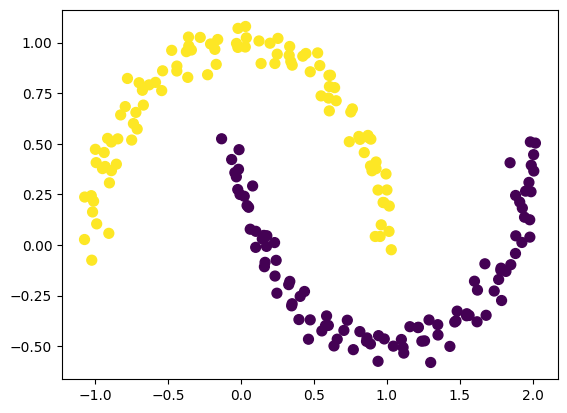

In [18]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
y_m_sc = model.fit_predict(X_m)
plt.scatter(X_m[:, 0], X_m[:, 1], c=y_m_sc, s = 50)